# Task-03 @ Prodigy InfoTech

### Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.
---
---

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\VINAY\Downloads\bank-additional-full.csv.zip", sep = ';')

In [3]:
pd.options.display.max_columns = None
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.shape

(41188, 21)

In [7]:
df.size

864948

In [8]:
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [9]:
df.duplicated().any()

True

In [10]:
df.duplicated().sum()

12

#### Removing duplicate values

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().any()

False

---
## Preprocessing of the Dataset

#### Drop the unnecessary columns

In [13]:
df = df.drop(['month', 'day_of_week', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis = 1)

df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,149,1,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,226,1,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,307,1,0,nonexistent,no


---
## Label Encoding for Binary Categorical Columns

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df.loc[:, 'default'] = label_encoder.fit_transform(df['default'])
df.loc[:, 'housing'] = label_encoder.fit_transform(df['housing'])
df.loc[:, 'loan'] = label_encoder.fit_transform(df['loan'])
df.loc[:, 'y'] = label_encoder.fit_transform(df['y'])  

In [15]:
df

,age,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,261,1,0,nonexistent,0
1,57,services,married,high.school,1,0,0,telephone,149,1,0,nonexistent,0
2,37,services,married,high.school,0,2,0,telephone,226,1,0,nonexistent,0
3,40,admin.,married,basic.6y,0,0,0,telephone,151,1,0,nonexistent,0
4,56,services,married,high.school,0,0,2,telephone,307,1,0,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,2,0,cellular,334,1,0,nonexistent,1
41184,46,blue-collar,married,professional.course,0,0,0,cellular,383,1,0,nonexistent,0
41185,56,retired,married,university.degree,0,2,0,cellular,189,2,0,nonexistent,0
41186,44,technician,married,professional.course,0,0,0,cellular,442,1,0,nonexistent,1


---
## One-Hot Encoding for Nominal Categorical Columns

In [16]:
df = pd.get_dummies(df, columns = ['job', 'marital', 'education', 'contact', 'poutcome'], drop_first = True)

In [17]:
df = df.astype(int)
df

,age,default,housing,loan,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_telephone,poutcome_nonexistent,poutcome_success
0,56,0,0,0,261,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
1,57,1,0,0,149,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0
2,37,0,2,0,226,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0
3,40,0,0,0,151,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
4,56,0,0,2,307,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,2,0,334,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
41184,46,0,0,0,383,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
41185,56,0,2,0,189,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
41186,44,0,0,0,442,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0


---
## Splitting Dataset into Features and Target

In [18]:
X = df.drop('y', axis = 1)
y = df['y']

### Splitting Dataset into Training and Testing Sets

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

---
## Building the Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 42)

### Training the Model

In [21]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

### Make Predictions

In [22]:
y_pred = classifier.predict(X_test)

---
## Model Evaluation

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
print(confusion_matrix(y_test, y_pred))

[[10634   295]
 [  902   522]]


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10929
           1       0.64      0.37      0.47      1424

    accuracy                           0.90     12353
   macro avg       0.78      0.67      0.71     12353
weighted avg       0.89      0.90      0.89     12353



In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9031004614263741


---
## Visualizing the Decision Tree

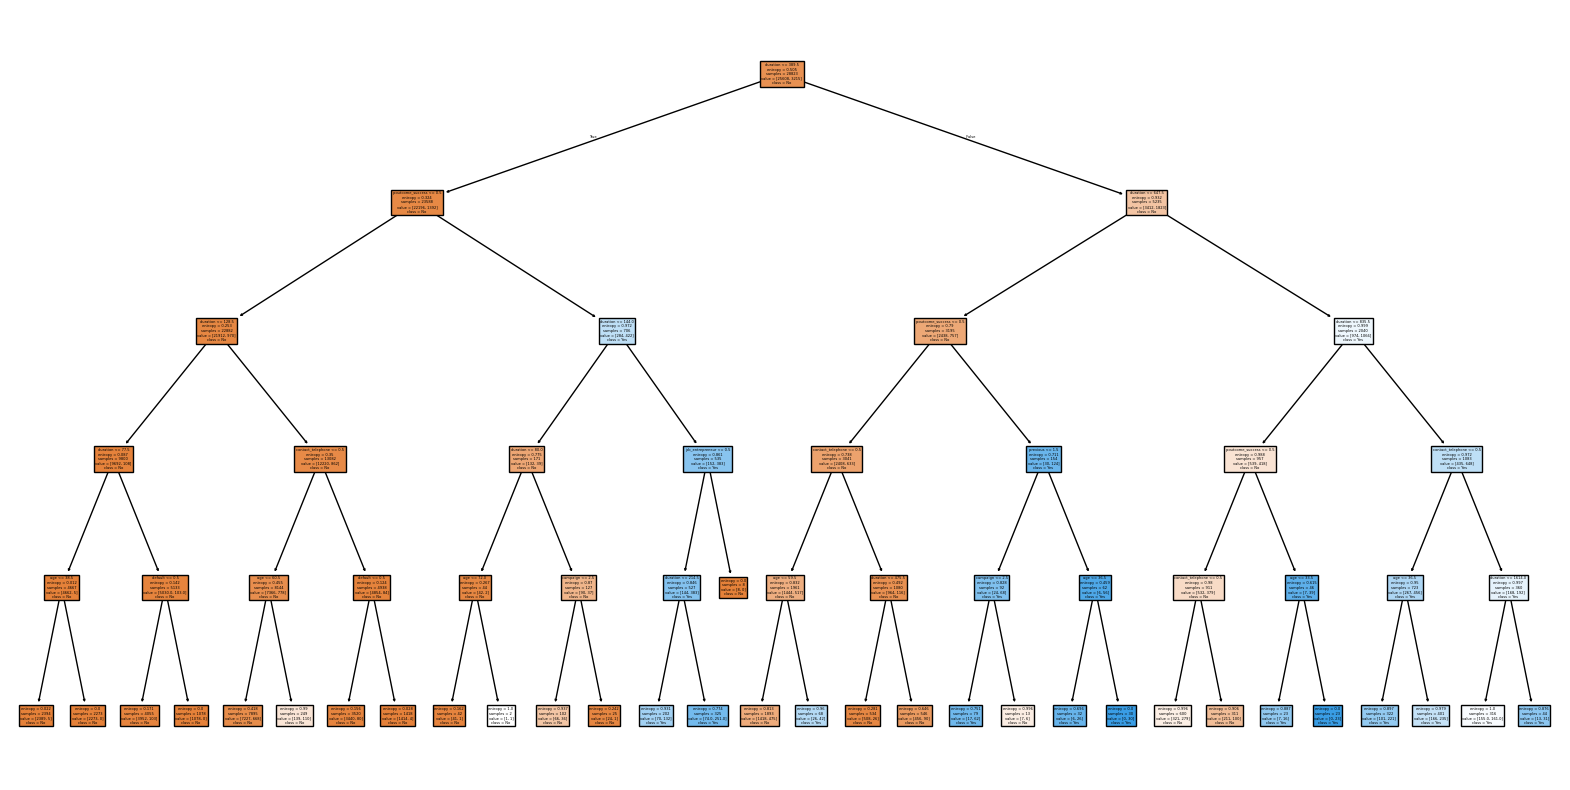

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()